In [1]:
1+1

2

In [2]:
import facial_keypoint_detecter as fkd


Importing package 'facial_keypoint_detecter'...
  + Adding module 'auxil'...
  - Done!
  + Adding module 'plots'...
  - Done!
  + Adding module 'data'...
  - Done!
  + Adding module 'model'...
  - Done!
  + Adding module 'preprocessing'...
  - Done!
Package 'facial_keypoint_detecter' imported sucessfully !!
version 1.0.0



In [3]:
net = fkd.model.Net()

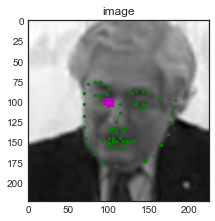

In [4]:
item = fkd.data.datasets.test.preprocessed[0]
im   = item["image"]
gts  = item["keypoints"]
out  = net.forward(im)
fkd.plots.plot_output(im, out, keypoints_gts = gts)

In [5]:
net = fkd.model.Net()
net.load_model('saved_models/20221030_20_3con_1fc_drop.pt')

Finished Training


Net(
  (criterion): SmoothL1Loss()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc): Linear(in_features=86528, out_features=136, bias=True)
)

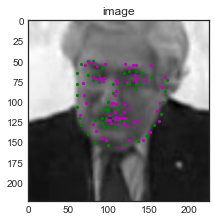

In [6]:
item = fkd.data.datasets.test.preprocessed[0]
im   = item["image"]
gts  = item["keypoints"]
out  = net.forward(im)
fkd.plots.plot_output(im, out, keypoints_gts = gts)

In [7]:
# load test data in batches
batch_size  = 10
test_loader =  fkd.data.DataLoader( fkd.data.datasets.test.preprocessed, 
                                    batch_size  = batch_size,
                                    shuffle     = True, 
                                    num_workers = 0 )


In [8]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net.sample_output(test_loader)

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

<class 'torch.Tensor'>
torch.Size([10, 1, 224, 224])
torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


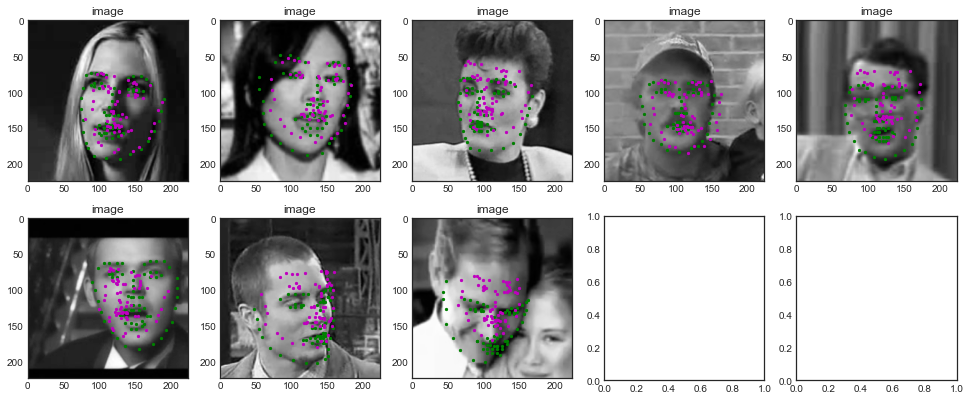

In [9]:
fkd.plots.plot_output(test_images, test_outputs, gt_pts, batch_size = 8)